Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.061565870246163
One-step MC price of an European put option is 7.948083702895388
Multi-step MC price of an European call option is 8.001921104214212
Multi-step MC price of an European put option is 7.942852360059748
One-step MC price of an Barrier call option is 7.820554853108634
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 8.057381707105638
Multi-step MC price of an Barrier put option is 2.020136326257153
One-step MC price of an Barrier call option with volatility decreased 10% is 6.92525862458218
One-step MC price of an Barrier put option with volatility decreased 10% is 0.0
Multi-step MC price of an Barrier call option with volatility decreased 10% is 7.2602187678022405
Multi-step MC price of an Barrier put option with volatility decreased 10% is 

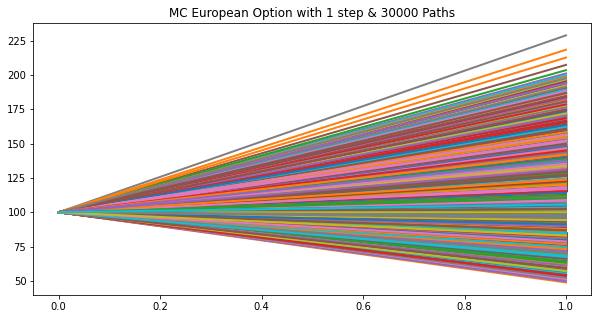

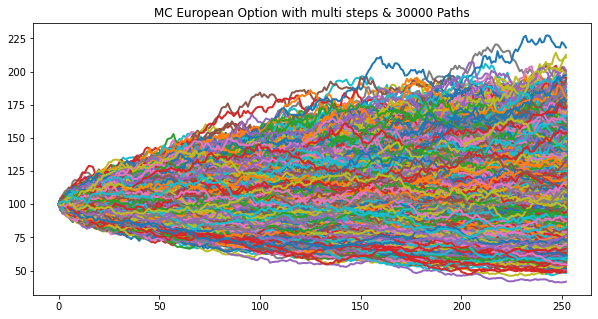

In [1]:
import numpy as np
from numpy import *
from scipy.stats import norm
import matplotlib.pyplot as plt
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier



# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
    # --------- Insert your code here --------- #
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    c = norm.cdf(d1) * S0 - norm.cdf(d2) * K * np.exp(-r * T)
    p = norm.cdf(-d2) * K * np.exp(-r * T) - norm.cdf(-d1) * S0
    return c, p

def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
    # --------- Insert your code here --------- #
    paths = np.zeros((numSteps + 1, numPaths))
    dT = T / numSteps
    paths[0] = [S0] * numPaths
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1))
    c = np.zeros((numPaths,1))
    p = np.zeros((numPaths,1))
    for iPath in range(numPaths):
        c[iPath] = np.maximum(paths[numSteps, iPath] - K, 0) * np.exp(-r * T)
        p[iPath] = np.maximum(K - paths[numSteps, iPath], 0) * np.exp(-r * T)
        if numSteps == 1:
            plt.figure(num=1, figsize=(10,5))
            plt.plot(paths[:,iPath], linewidth=2)
            plt.title('MC European Option with 1 step & 30000 Paths')
        elif numSteps == 252:
            plt.figure(num=2, figsize=(10,5))
            plt.plot(paths[:,iPath], linewidth=2)
            plt.title('MC European Option with multi steps & 30000 Paths')
    c = np.mean(c)
    p = np.mean(p)
    return c, p

def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
    # --------- Insert your code here --------- #
    paths = np.zeros((numSteps + 1, numPaths))
    dT = T / numSteps
    paths[0] = [S0] * numPaths
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1))
    c = np.zeros((numPaths,1))
    p = np.zeros((numPaths,1))
    knockin = np.sum(paths >= Sb, axis=0)
    for iPath in range(numPaths):
        if knockin[iPath] > 0:
            c[iPath] = np.maximum(paths[numSteps, iPath] - K, 0) * np.exp(-r * T)
            p[iPath] = np.maximum(K - paths[numSteps, iPath], 0) * np.exp(-r * T)
        else:
            c[iPath] = 0
            p[iPath] = 0

    c = np.mean(c)
    p = np.mean(p)
    return c, p

# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 252
numPaths = 30000

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
  BS_european_price(S0, K, T, r, sigma) #(...)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step = \
  MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths) #(...)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step = \
  MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths) #(...)

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths) #(...)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths) #(...)

# Implement your one-step Monte Carlo pricing procedure for Barrier option with volatility decreased 10%
callMC_Barrier_Knockin_Price_1_step_dec, putMC_Barrier_Knockin_Price_1_step_dec = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, 1, numPaths) #(...)

# Implement your one-step Monte Carlo pricing procedure for Barrier option with volatility increased 10%
callMC_Barrier_Knockin_Price_1_step_inc, putMC_Barrier_Knockin_Price_1_step_inc = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, 1, numPaths) #(...)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option with volatility decreased 10%
callMC_Barrier_Knockin_Price_multi_step_dec, putMC_Barrier_Knockin_Price_multi_step_dec = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, numSteps, numPaths) #(...)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option with volatility increased 10%
callMC_Barrier_Knockin_Price_multi_step_inc, putMC_Barrier_Knockin_Price_multi_step_inc = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, numSteps, numPaths) #(...)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))
print('One-step MC price of an Barrier call option with volatility decreased 10% is ' + str(callMC_Barrier_Knockin_Price_1_step_dec)) 
print('One-step MC price of an Barrier put option with volatility decreased 10% is ' + str(putMC_Barrier_Knockin_Price_1_step_dec)) 
print('Multi-step MC price of an Barrier call option with volatility decreased 10% is ' + str(callMC_Barrier_Knockin_Price_multi_step_dec)) 
print('Multi-step MC price of an Barrier put option with volatility decreased 10% is ' + str(putMC_Barrier_Knockin_Price_multi_step_dec))
print('One-step MC price of an Barrier call option with volatility increased 10% is ' + str(callMC_Barrier_Knockin_Price_1_step_inc)) 
print('One-step MC price of an Barrier put option with volatility increased 10% is ' + str(putMC_Barrier_Knockin_Price_1_step_inc)) 
print('Multi-step MC price of an Barrier call option with volatility increased 10% is ' + str(callMC_Barrier_Knockin_Price_multi_step_inc)) 
print('Multi-step MC price of an Barrier put option with volatility increased 10% is ' + str(putMC_Barrier_Knockin_Price_multi_step_inc))

# Plot results
# --------- Insert your code here --------- #
# plot funcitons are included in previous function

In [20]:
for n_s in range(2,6):
    find = False
    for n_p in range(20000,50000,2500):
        c, p = MC_european_price(S0, K, T, r, mu, sigma, n_s, n_p)
        if np.abs(call_BS_European_Price-c) <= 0.01 and np.abs(putBS_European_Price-p) <= 0.01: 
            print("number of steps: {}, number of paths: {}, call price: {}, put price: {}".format(n_s, n_p, c, p))
            find = True
            break
    if find:
        break

number of steps: 4, number of paths: 25000, call price: 8.019821868142378, put price: 7.908709182196518
